**Exposure Model** for the **HL** Category: High Vulnerability and Low Resilience

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
from sklearn.inspection import permutation_importance
import eli5
from eli5.sklearn import PermutationImportance
import shap
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SequentialFeatureSelector

In [2]:
# Read in data and define x and y
df = pd.read_csv('1_exposure_HL.csv')
y = df['exp_mean']
x = df.drop(['NAME','Kmeans_t','vulnerability','exp_w','exp_un','exp_mean'], axis = 1)

,NAME,Kmeans_t,vulnerability,exp_w,exp_un,exp_mean,pop,popdenA,pre_mean_an,pre_std_an,...,flood_100A,landslide_FEMA,imperviousR,change_forestR,road_floA,bldgA,dev_floA,dis_water,hous_denA,road_1000
0,5007.0,HL,6.697910,8.071256,7.487441,7.779349,1.638770,1.450119,-0.806168,-0.544791,...,-0.140608,-0.533048,0.171651,0.201596,-0.192671,-0.161108,-0.212719,0.377174,-0.063845,-0.360270
1,5009.0,HL,6.446847,7.927770,7.115524,7.521647,0.795361,0.829984,-0.801960,-0.549512,...,-0.140608,-0.533048,0.246722,0.201596,-0.192671,-0.161108,-0.212719,0.257780,-0.020148,-0.309345
2,5010.0,HL,6.216128,7.825694,6.977054,7.401374,0.462784,1.263725,-0.806168,-0.544791,...,-0.140608,-0.533048,0.285137,0.201596,-0.192671,-0.161108,-0.212719,0.297054,0.183770,-0.345139
3,5011.0,HL,6.466253,7.925154,6.920194,7.422674,0.188800,0.150661,-0.806168,-0.544791,...,-0.140608,-0.533048,0.391422,0.201596,-0.192671,-0.161108,-0.212719,0.356948,-0.107542,-0.097032
4,5012.0,HL,6.741391,7.727913,6.407444,7.067679,-0.923642,0.071157,-0.806168,-0.544791,...,-0.140608,-0.533048,0.359040,0.201596,-0.192671,-0.161108,-0.212719,0.160487,-0.209501,-0.051850
5,5013.0,HL,6.853711,7.977605,7.116800,7.547203,0.302685,0.249600,-0.806168,-0.544791,...,-0.140608,-0.533048,0.493098,0.201596,-0.192671,-0.161108,-0.212719,-0.032557,-0.203258,-0.066831
6,5016.0,HL,6.108096,7.540768,6.532073,7.036420,-0.379800,-0.320182,-0.746794,-0.578384,...,-0.140608,-0.533048,0.178229,0.201596,-0.192671,-0.161108,-0.212719,-0.481259,0.198336,-0.125538
7,5019.0,HL,6.552559,7.381836,6.673852,7.027844,0.157440,1.481038,-0.737227,-0.514377,...,-0.140608,-0.533048,0.347937,0.201596,-0.192671,-0.161108,-0.212719,-0.407609,0.485486,-0.335550
8,5026.0,HL,7.030042,8.505392,7.589955,8.047673,1.000849,-0.570180,-0.743635,-0.544137,...,-0.140608,-0.533048,-0.423007,0.201596,-0.192671,-0.161108,-0.212719,0.205234,-1.339374,0.035693
9,5027.0,HL,6.750647,7.770409,6.714069,7.242239,-0.223002,-0.741557,-0.671652,-0.447966,...,-0.140608,-0.533048,0.101596,0.201596,-0.192671,-0.161108,-0.212719,-0.146267,-0.910730,0.228992


1. Run the random forest exposure model

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END ...max_depth=10, max_features=sqrt, n_estimators=50; total time=   0.0s
[CV] END ...max_depth=10, max_features=sqrt, n_estimators=50; total time=   0.0s
[CV] END ...max_depth=10, max_features=sqrt, n_estimators=50; total time=   0.0s
[CV] END ...max_depth=10, max_features=sqrt, n_estimators=50; total time=   0.0s
[CV] END ...max_depth=10, max_features=sqrt, n_estimators=50; total time=   0.0s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=100; total time=   0.0s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=100; total time=   0.0s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=100; total time=   0.0s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=200; total time=   0.2s
[CV] END ..max_depth=10, max_features=sqrt, n_e

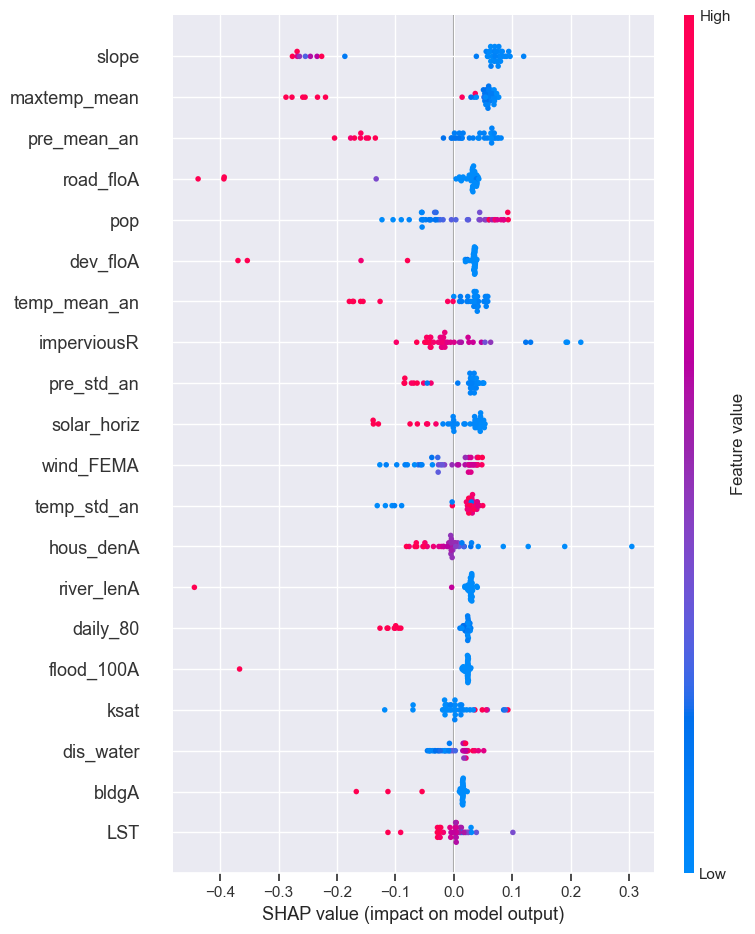

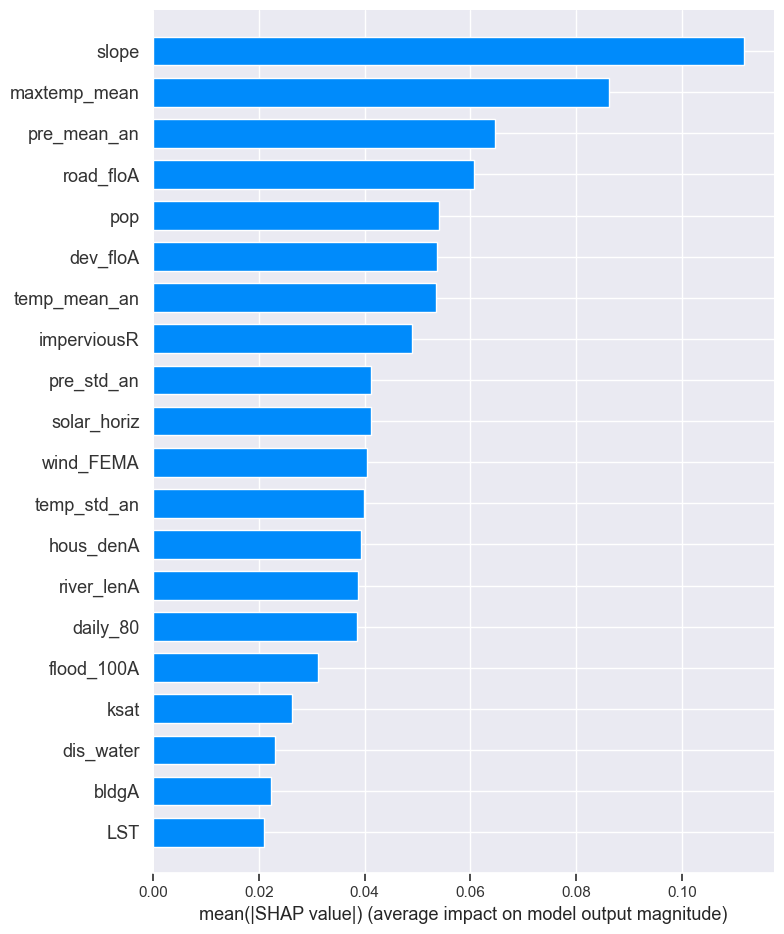

[0.6905]
[0.6510240202311783]
[0.6576864787994281]
[0.3779387007804476]
[0.5608162932441958]
{'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 100}


In [9]:
# Lists to store performance metrics
R2_CV_list = [] # Cross-validated R² scores
R2_oob_list = [] # Out-of-bag R² score
RMSE_list = [] # Root Mean Squared Error
MAE_list = [] # Mean Absolute Error
R2_list = [] # R² scores

# Run the model for a specific random state (seed = 42)
for i in range(42, 43):
    # Split data into training and testing sets (70% train, 30% test)
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = i)
    
    # Define a parameter grid for GridSearchCV to find the best hyperparameters
    my_param_grid = {
        'n_estimators': [50, 100, 200],  # Number of trees in the forest
        'max_features': ['sqrt', 'log2', None],  # Number of features to consider at each split
        'max_depth': [10, 20, 30],  # Maximum depth of the trees (None allows unlimited depth)
    }

    # Use GridSearchCV to find the best combination of parameters
    grid = GridSearchCV(
        estimator = RandomForestRegressor(random_state = i), 
        param_grid = my_param_grid, 
        refit = True, 
        verbose=2, 
        cv=5
    )
    grid.fit(x_train, y_train)
    
    # Extract the best hyperparameters after GridSearchCV
    best_params = grid.best_params_
    max_depth_value = best_params.get('max_depth')
    max_features_value = best_params.get('max_features')
    n_estimators_value = best_params.get('n_estimators')

    # Train the RandomForestRegressor with the best parameters
    RF_regression = RandomForestRegressor(
        max_depth = max_depth_value, 
        max_features= max_features_value, 
        n_estimators= n_estimators_value, 
        random_state = i
    )
    RF_regression.fit(x_train, y_train)
    y_hat = RF_regression.predict(x_test) # Predict test set

    # Store predictions in a DataFrame for reference
    predictions = pd.DataFrame({'y_test':y_test, 'y_hat':y_hat})
    
    # Calculate cross-validated R² score
    R2 = cross_val_score(
        estimator = RandomForestRegressor(
            max_depth = max_depth_value, 
            max_features= max_features_value, 
            n_estimators= n_estimators_value, 
            random_state = i
        ), 
        X = x_train, 
        y = y_train, 
        cv = 5, 
        scoring = "r2"
    )
    R2_CV = round(np.mean(R2),4)
    R2_CV_list.append(R2_CV)

    # Calculate out-of-bag R² score
    RF_oob = RandomForestRegressor(
        max_depth = max_depth_value, 
        max_features= max_features_value, 
        n_estimators= n_estimators_value,
        oob_score=True,
        random_state = i
    )
    RF_oob.fit(x_train, y_train)
    R2_oob_list.append(RF_oob.oob_score_)
    
    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_hat))
    RMSE_list.append(rmse)
    
    # Calculate MAE
    mae = mean_absolute_error(y_test, y_hat)
    MAE_list.append(mae)
    
    # Calculate R²
    r2 = r2_score(y_test, y_hat)
    R2_list.append(r2)

    # Perform permutation importance analysis
    rf = RandomForestRegressor(
        max_depth = max_depth_value, 
        max_features= max_features_value, 
        n_estimators=n_estimators_value, 
        oob_score=True, 
        random_state = i
    )
    rf.fit(x_train, y_train)
    result = permutation_importance(rf, x_test, y_test, n_repeats=10, random_state=i)

    # Extract feature importance and sort by importance
    perm_importances = result.importances_mean
    perm_std = result.importances_std
    sorted_idx = perm_importances.argsort()
    feature_names = x_test.columns
    pd.DataFrame(
        {'Importance': perm_importances, "Std": perm_std},
        index=feature_names[sorted_idx]).sort_values('Importance',ascending=False)

    # Calculate feature importance using PermutationImportance
    rf_1 = RandomForestRegressor(
        max_depth = max_depth_value, 
        max_features= max_features_value, 
        n_estimators=n_estimators_value,
        oob_score=True, 
        random_state = i
    )
    rf_1.fit(x_train,y_train)
    perm = PermutationImportance(rf_1, random_state = i).fit(x_test, y_test)
    importance = perm.feature_importances_

    feature_names = x_test.columns
    pd.DataFrame({'Importance': importance},
             index=feature_names[sorted_idx]).sort_values('Importance',ascending=False)

    # Use SHAP to explain the predictions
    explainer = shap.TreeExplainer(rf)
    shap_values = explainer.shap_values(x_test)
    shap.summary_plot(shap_values, features = x_test)
    shap.summary_plot(shap_values, features=x, feature_names=x_test.columns, plot_type='bar')

# Print the collected metrics and the best parameters from GridSearchCV
print("Cross-validated R² scores:", R2_CV_list)
print("Out-of-bag R² scores:", R2_oob_list)
print("RMSE values:", RMSE_list)
print("MAE values:", MAE_list)
print("R² scores:", R2_list)
print("Best parameters:", grid.best_params_)

2. Backward feature selection

In [15]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Initialize the Random Forest model with out-of-bag error estimation
rf_model = RandomForestRegressor(
    max_depth = 10, 
    max_features = "sqrt", 
    n_estimators=100, 
    random_state=42
)

sfs = SequentialFeatureSelector(
    rf_model, 
    n_features_to_select="auto", 
    direction='backward', 
    cv=5
)
sfs.fit(x_train, y_train)

# Selected features
selected_features = x.columns[sfs.get_support()]
print("Selected features with Sequential Feature Selector:", selected_features)


Selected features with Sequential Feature Selector: Index(['pop', 'pre_std_an', 'wetday', 'river_lenA', 'maxtemp_mean', 'LST',
       'wind_FEMA', 'flood_100A', 'imperviousR', 'change_forestR', 'road_floA',
       'bldgA', 'dev_floA'],
      dtype='object')


                     pop   popdenA  pre_mean_an  pre_std_an  daily_80  \
pop             1.000000  0.324057     0.154067    0.146069  0.165834   
popdenA         0.324057  1.000000     0.095675    0.084213  0.103020   
pre_mean_an     0.154067  0.095675     1.000000    0.988934  0.986350   
pre_std_an      0.146069  0.084213     0.988934    1.000000  0.983742   
daily_80        0.165834  0.103020     0.986350    0.983742  1.000000   
wetday          0.072301  0.128792     0.652277    0.626971  0.604619   
river_lenA     -0.020676 -0.206591    -0.081401   -0.098874 -0.039811   
temp_mean_an    0.155772  0.068699     0.990227    0.991214  0.984460   
maxtemp_mean    0.179928  0.081043     0.978195    0.973999  0.988395   
temp_std_an    -0.120176 -0.022917    -0.957430   -0.969812 -0.950043   
LST            -0.097673  0.347391    -0.397212   -0.399078 -0.389935   
wind_FEMA       0.369230  0.009920    -0.168951   -0.204596 -0.223190   
solar_horiz     0.135689  0.070651     0.992338    

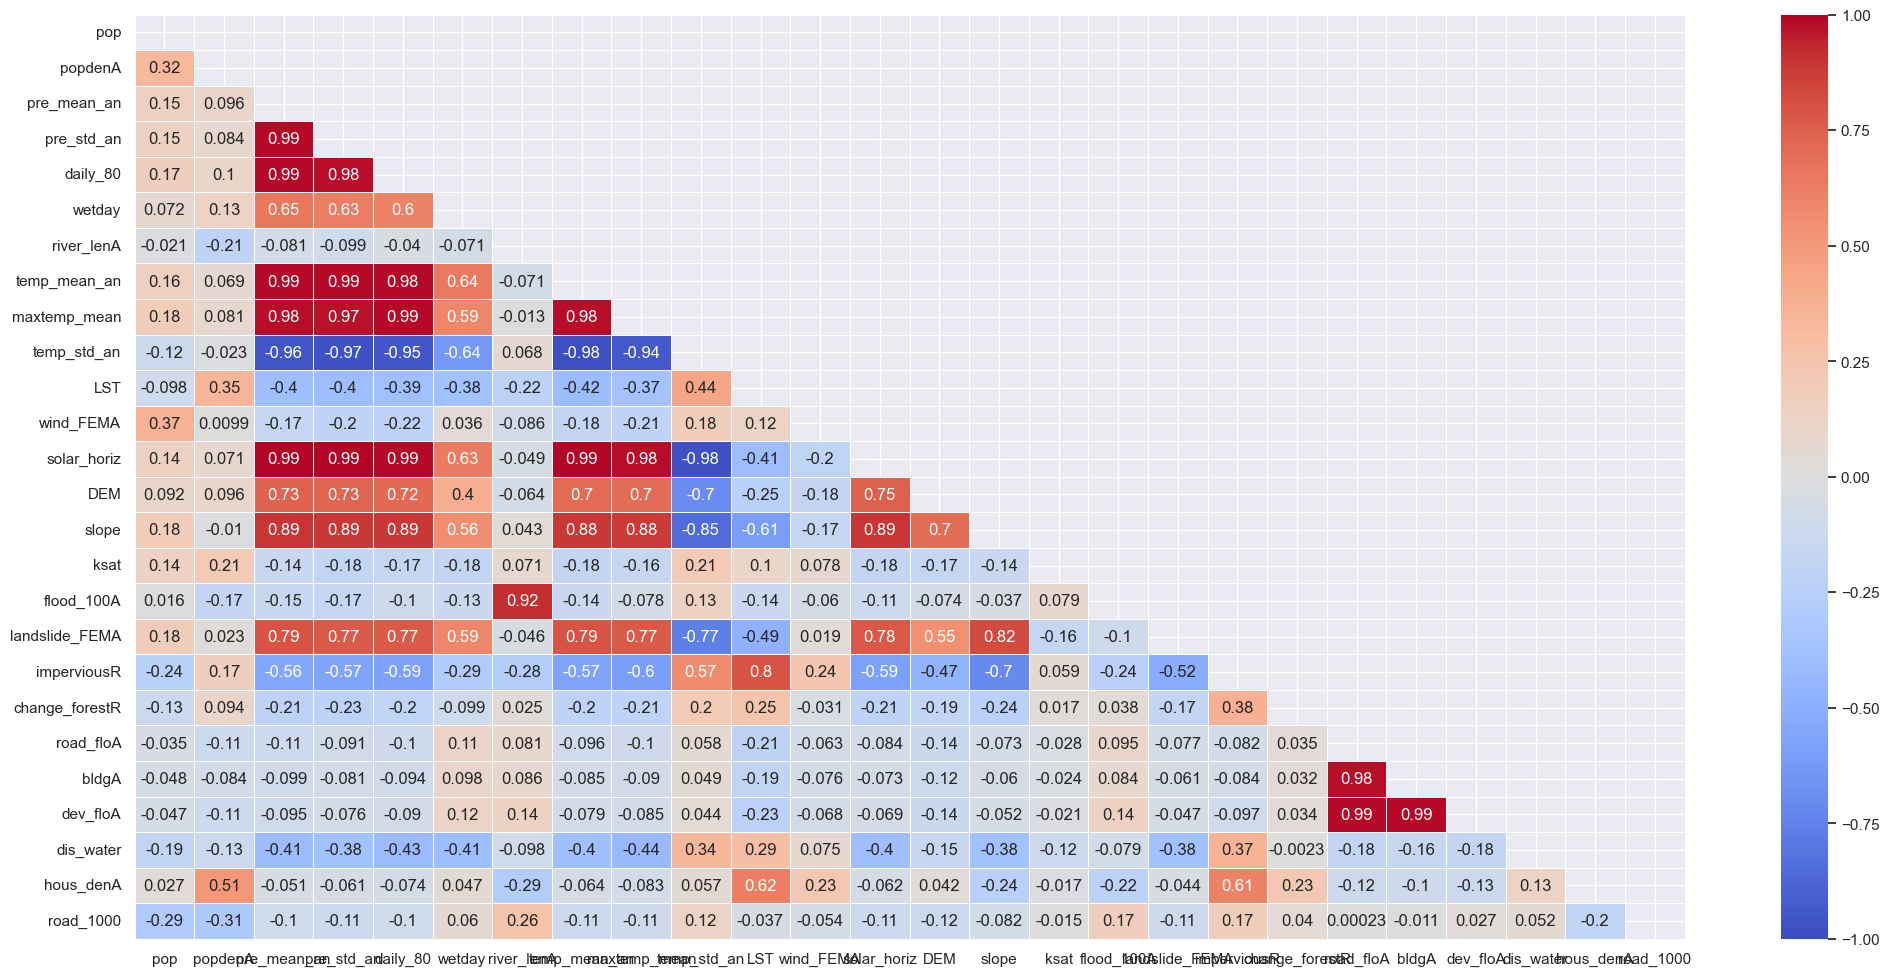

In [16]:
# Calculate the correlation matrix to analyze the relationships between features
correlation_matrix = x.corr()
print(correlation_matrix)

# Create a mask to only show the lower triangle of the correlation matrix
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(25, 12))

# Plot the heatmap with the x-axis labels aligned horizontally
sns.heatmap(
    correlation_matrix, 
    mask=mask, 
    annot=True, 
    cmap="coolwarm",
    vmin=-1, 
    vmax=1, 
    center=0, 
    linewidths=0.5, 
    linecolor='white',
    cbar_kws={"orientation": "vertical"}
)

# Rotate the x-axis labels to be horizontal
plt.xticks(rotation=0)

# Display the heatmap
plt.show()

3. Rerun the random forest exposure model

In [ ]:
y = df['exp_mean']
x = df[['pop', 'pre_std_an', 'wetday', 'river_lenA', 'maxtemp_mean', 'LST',
       'wind_FEMA', 'flood_100A', 'imperviousR', 'change_forestR', 'road_floA',
       'bldgA', 'dev_floA']]

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END ...max_depth=10, max_features=sqrt, n_estimators=50; total time=   0.0s
[CV] END ...max_depth=10, max_features=sqrt, n_estimators=50; total time=   0.0s
[CV] END ...max_depth=10, max_features=sqrt, n_estimators=50; total time=   0.0s
[CV] END ...max_depth=10, max_features=sqrt, n_estimators=50; total time=   0.0s
[CV] END ...max_depth=10, max_features=sqrt, n_estimators=50; total time=   0.0s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=100; total time=   0.0s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=100; total time=   0.0s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=100; total time=   0.0s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=100; total time=   0.0s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=100; total time=   0.0s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=200; total time=   0.1s
[CV] END ..max_depth=10, max_features=sqrt, n_e

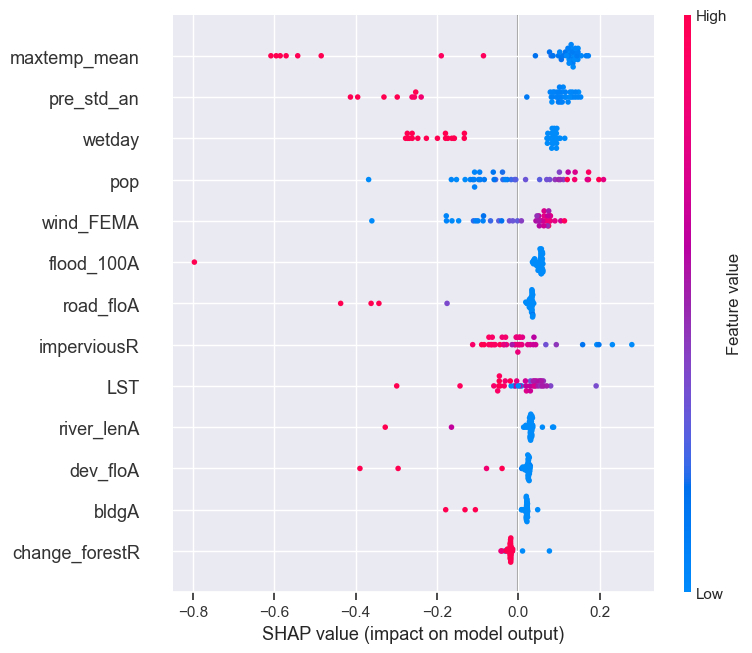

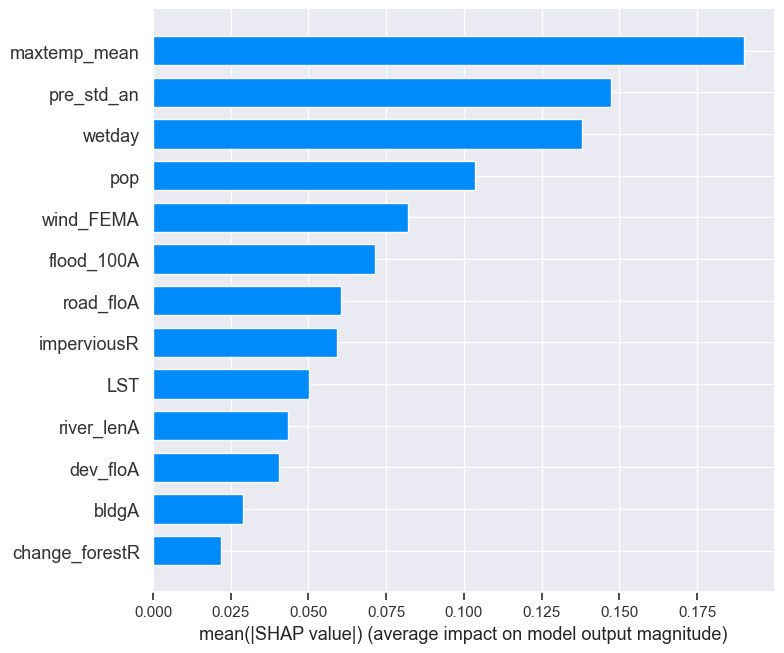

[0.7623]
[0.6951040226852173]
[0.6327895307674494]
[0.3670902635580495]
[0.5934378318716116]
{'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 50}


In [23]:
# Lists to store performance metrics
R2_CV_list = [] # Cross-validated R² scores
R2_oob_list = [] # Out-of-bag R² score
RMSE_list = [] # Root Mean Squared Error
MAE_list = [] # Mean Absolute Error
R2_list = [] # R² scores

# Run the model for a specific random state (seed = 42)
for i in range(42, 43):
    # Split data into training and testing sets (70% train, 30% test)
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = i)
    
    # Define a parameter grid for GridSearchCV to find the best hyperparameters
    my_param_grid = {
        'n_estimators': [50, 100, 200],  # Number of trees in the forest
        'max_features': ['sqrt', 'log2', None],  # Number of features to consider at each split
        'max_depth': [10, 20, 30],  # Maximum depth of the trees (None allows unlimited depth)
    }

    # Use GridSearchCV to find the best combination of parameters
    grid = GridSearchCV(
        estimator = RandomForestRegressor(random_state = i), 
        param_grid = my_param_grid, 
        refit = True, 
        verbose=2, 
        cv=5
    )
    grid.fit(x_train, y_train)
    
    # Extract the best hyperparameters after GridSearchCV
    best_params = grid.best_params_
    max_depth_value = best_params.get('max_depth')
    max_features_value = best_params.get('max_features')
    n_estimators_value = best_params.get('n_estimators')

    # Train the RandomForestRegressor with the best parameters
    RF_regression = RandomForestRegressor(
        max_depth = max_depth_value, 
        max_features= max_features_value, 
        n_estimators= n_estimators_value, 
        random_state = i
    )
    RF_regression.fit(x_train, y_train)
    y_hat = RF_regression.predict(x_test) # Predict test set

    # Store predictions in a DataFrame for reference
    predictions = pd.DataFrame({'y_test':y_test, 'y_hat':y_hat})
    
    # Calculate cross-validated R² score
    R2 = cross_val_score(
        estimator = RandomForestRegressor(
            max_depth = max_depth_value, 
            max_features= max_features_value, 
            n_estimators= n_estimators_value, 
            random_state = i
        ), 
        X = x_train, 
        y = y_train, 
        cv = 5, 
        scoring = "r2"
    )
    R2_CV = round(np.mean(R2),4)
    R2_CV_list.append(R2_CV)

    # Calculate out-of-bag R² score
    RF_oob = RandomForestRegressor(
        max_depth = max_depth_value, 
        max_features= max_features_value, 
        n_estimators= n_estimators_value,
        oob_score=True,
        random_state = i
    )
    RF_oob.fit(x_train, y_train)
    R2_oob_list.append(RF_oob.oob_score_)
    
    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_hat))
    RMSE_list.append(rmse)
    
    # Calculate MAE
    mae = mean_absolute_error(y_test, y_hat)
    MAE_list.append(mae)
    
    # Calculate R²
    r2 = r2_score(y_test, y_hat)
    R2_list.append(r2)

    # Perform permutation importance analysis
    rf = RandomForestRegressor(
        max_depth = max_depth_value, 
        max_features= max_features_value, 
        n_estimators=n_estimators_value, 
        oob_score=True, 
        random_state = i
    )
    rf.fit(x_train, y_train)
    result = permutation_importance(rf, x_test, y_test, n_repeats=10, random_state=i)

    # Extract feature importance and sort by importance
    perm_importances = result.importances_mean
    perm_std = result.importances_std
    sorted_idx = perm_importances.argsort()
    feature_names = x_test.columns
    pd.DataFrame(
        {'Importance': perm_importances, "Std": perm_std},
        index=feature_names[sorted_idx]).sort_values('Importance',ascending=False)

    # Calculate feature importance using PermutationImportance
    rf_1 = RandomForestRegressor(
        max_depth = max_depth_value, 
        max_features= max_features_value, 
        n_estimators=n_estimators_value,
        oob_score=True, 
        random_state = i
    )
    rf_1.fit(x_train,y_train)
    perm = PermutationImportance(rf_1, random_state = i).fit(x_test, y_test)
    importance = perm.feature_importances_

    feature_names = x_test.columns
    pd.DataFrame({'Importance': importance},
             index=feature_names[sorted_idx]).sort_values('Importance',ascending=False)

    # Use SHAP to explain the predictions
    explainer = shap.TreeExplainer(rf)
    shap_values = explainer.shap_values(x_test)
    shap.summary_plot(shap_values, features = x_test)
    shap.summary_plot(shap_values, features=x, feature_names=x_test.columns, plot_type='bar')

# Print the collected metrics and the best parameters from GridSearchCV
print("Cross-validated R² scores:", R2_CV_list)
print("Out-of-bag R² scores:", R2_oob_list)
print("RMSE values:", RMSE_list)
print("MAE values:", MAE_list)
print("R² scores:", R2_list)
print("Best parameters:", grid.best_params_)